In [1]:
"""
Takes results path and plots some observable over time, specified at the bottom of the script.
"""
import os
os.environ["JAX_PLATFORMS"] = "cpu"

import matplotlib.pyplot as plt
import json
import dotenv
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:

root_path = '/net/vast-storage/scratch/vast/mcdermott/rphess/modula-v2/'
path = Path(root_path) / "experiment/results/"
sub_folders = ['adam_results', 'hardcap_results', 'orthog_results', 'softcap_results', 'spec_normalize_results', 'spec_wd_results', 'specham_results', 'normal_wd_results']

results_concatenated = []
# iterate over all subfolders and open all json files in them
for sub_folder in sub_folders:
    sub_folder_path = path / sub_folder
    for json_file in sub_folder_path.glob('*.json'):
        with open(json_file, 'r') as f:
            data = json.load(f)
            # add the data to the results list
            if 'adam' in sub_folder:
                optim = 'adam'
            else:
                optim = 'muon'
            results = data['results']
            technique = data['parameters']['project']['default']
            lr = data['parameters']['lr']
            wmax = data['parameters']['w_max']
            best_train_loss = min(results['losses'])
            best_val_loss = min(results['val_losses'])
            best_train_acc = max(results['train_accuracies'])
            best_val_acc = max(results['accuracies'])
            final_train_loss = results['losses'][-1]
            final_val_loss = results['val_losses'][-1]
            final_train_acc = results['train_accuracies'][-1]
            final_val_acc = results['accuracies'][-1]
            spec_wd = data['parameters']['spectral_wd']
            wd = data['parameters']['wd']
            row = {
                'technique': technique,
                'lr': lr,
                'w_max': wmax,
                'best_train_loss': best_train_loss,
                'best_val_loss': best_val_loss,
                'best_train_acc': best_train_acc,
                'best_val_acc': best_val_acc,
                'final_train_loss': final_train_loss,
                'final_val_loss': final_val_loss,
                'final_train_acc': final_train_acc,
                'final_val_acc': final_val_acc,
                'spectral_wd': spec_wd,
                'wd': wd,
                'optim': optim,
            }
            results_concatenated.append(row)
# create a dataframe from the results
results_df = pd.DataFrame(results_concatenated)

In [3]:
results_df

,technique,lr,w_max,best_train_loss,best_val_loss,best_train_acc,best_val_acc,final_train_loss,final_val_loss,final_train_acc,final_val_acc,spectral_wd,wd,optim
0,none,0.000010,1,1.843198,1.853964,0.404297,0.348633,1.851789,1.853964,0.363281,0.347070,0.0,0.010000,adam
1,none,0.000040,1,1.625200,1.644507,0.462891,0.420605,1.640673,1.644549,0.427734,0.419922,0.0,0.010000,adam
2,none,0.000020,1,1.741935,1.754621,0.429688,0.383691,1.754885,1.754626,0.373047,0.382227,0.0,0.010000,adam
3,none,0.000010,1,1.843344,1.854011,0.404297,0.347754,1.851957,1.854011,0.365234,0.346973,0.0,0.016681,adam
4,none,0.000040,1,1.623695,1.642736,0.460938,0.421387,1.639595,1.642782,0.427734,0.420312,0.0,0.016681,adam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,none,6.309573,0,0.598449,1.261714,0.814453,0.561230,0.598449,1.262724,0.812500,0.561230,0.0,0.046416,muon
1606,none,6.309573,0,0.856144,1.190190,0.748047,0.577832,0.856144,1.190190,0.736328,0.577832,0.0,0.100000,muon
1607,none,6.309573,0,1.235084,1.335322,0.619141,0.549219,1.235084,1.335322,0.593750,0.549219,0.0,0.215443,muon
1608,none,6.309573,0,1.744547,1.755071,0.462891,0.441602,1.744547,1.755071,0.431641,0.441602,0.0,0.464159,muon


In [45]:
# count of rows with adam
adam_count = len(results_df[results_df['optim'] == 'adam'])
# count of rows with muon
muon_count = len(results_df[results_df['optim'] == 'muon'])

print(f"Number of rows with adam: {adam_count}")
print(f"Number of rows with muon: {muon_count}")

Number of rows with adam: 682
Number of rows with muon: 928


In [ ]:
lr_we_expect = np.logspace(-2, 1, 16)


In [4]:
# print all unique optim, technique pairs
unique_optim_technique_pairs = results_df[['optim', 'technique']].drop_duplicates()
print("Unique optim, technique pairs:")
print(unique_optim_technique_pairs)

Unique optim, technique pairs:
     optim       technique
0     adam            none
160   adam      orthogonal
282   adam     spec_hammer
410   adam  spec_normalize
522   adam         spec_wd
682   muon        hard_cap
794   muon      orthogonal
906   muon        soft_cap
1018  muon  spec_normalize
1130  muon         spec_wd
1290  muon     spec_hammer
1450  muon            none


In [44]:
# for optim = adam, technique = orthogonal, print all unique lr sorting by lr
unique_lr = results_df[(results_df['optim'] == 'muon') & (results_df['technique'] == 'spec_hammer') & (results_df['w_max'] == 3)]['lr'].drop_duplicates().sort_values()
print("Unique lrs for adam, orthogonal:")
print(unique_lr)

Unique lrs for adam, orthogonal:
1292    0.001000
1294    0.001585
1298    0.002512
1300    0.003981
1304    0.006310
1306    0.010000
1319    0.015849
1328    0.025119
1341    0.039811
1346    0.063096
1363    0.100000
1373    0.158489
1376    0.251189
1390    0.398107
1398    0.630957
1407    1.000000
Name: lr, dtype: float64


In [37]:
np.logspace(-2, 1, 16)

array([ 0.01      ,  0.01584893,  0.02511886,  0.03981072,  0.06309573,
        0.1       ,  0.15848932,  0.25118864,  0.39810717,  0.63095734,
        1.        ,  1.58489319,  2.51188643,  3.98107171,  6.30957344,
       10.        ])

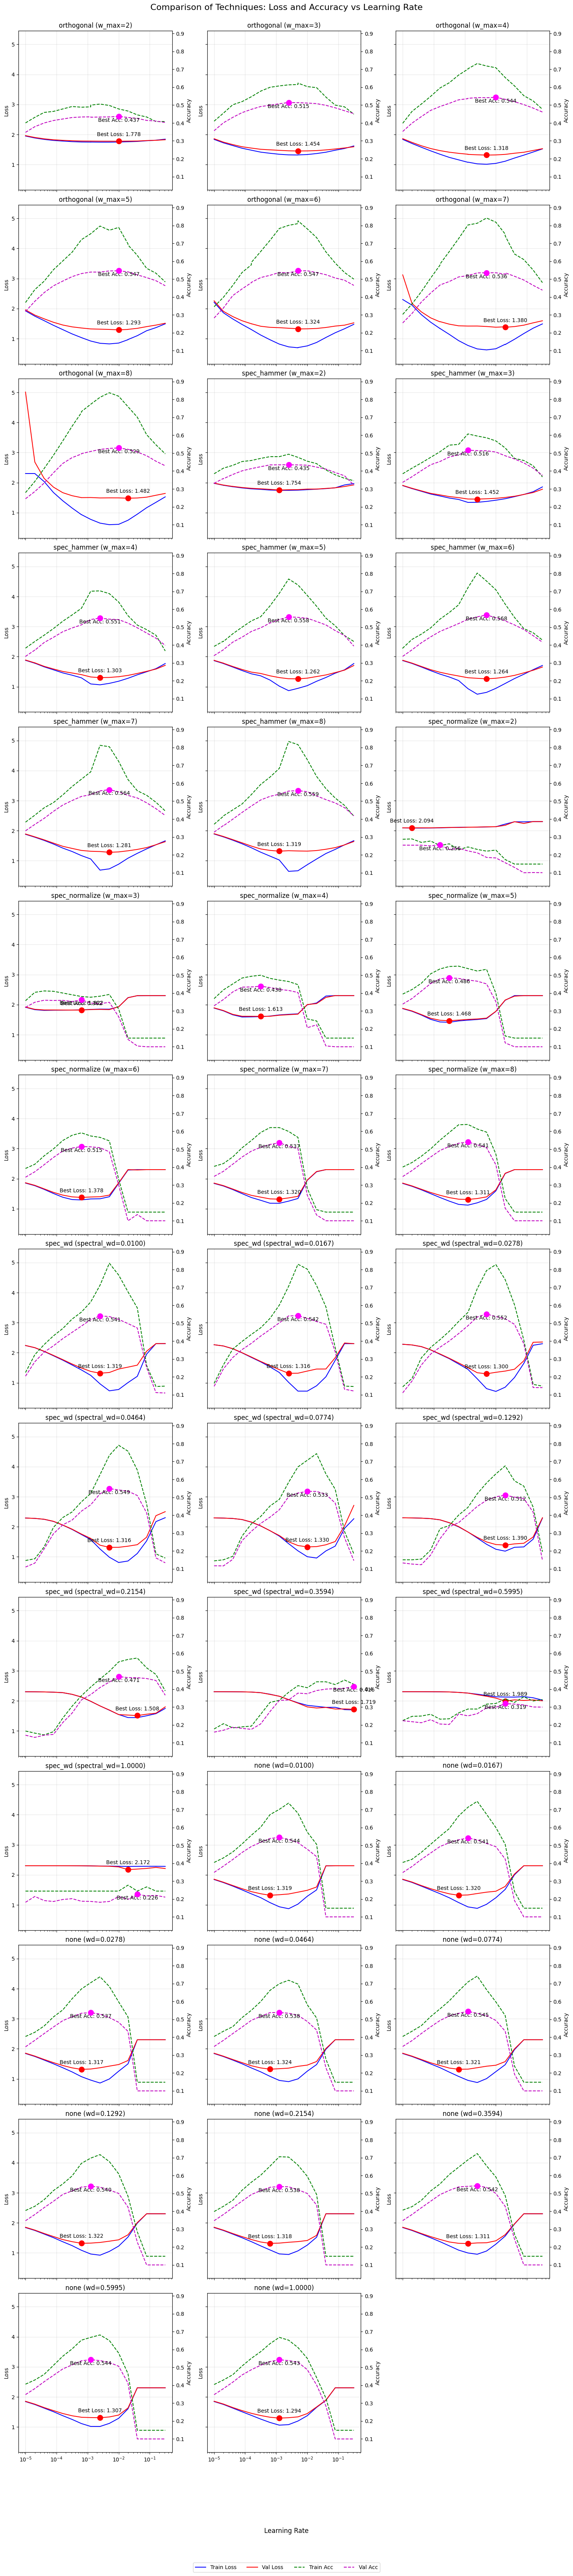

In [4]:
# Create a copy of the dataframe for plotting
plot_df = results_df.copy()

# For 'spec_wd' technique, group by 'spectral_wd' instead of 'w_max'
spec_wd_mask = plot_df['technique'] == 'spec_wd'
none_mask = plot_df['technique'] == 'none'
other_mask = ~(spec_wd_mask | none_mask)

# Group the dataframes separately
grouped_other = plot_df[other_mask].groupby(['technique', 'w_max'])
grouped_spec_wd = plot_df[spec_wd_mask].groupby(['technique', 'spectral_wd'])
grouped_none = plot_df[none_mask].groupby(['technique', 'wd'])  # Group 'none' by 'spectral_wd' which acts as 'wd'

# Get unique combinations for all groups
technique_wmax_pairs = list(grouped_other.groups.keys())
technique_spectral_wd_pairs = list(grouped_spec_wd.groups.keys())
technique_none_wd_pairs = list(grouped_none.groups.keys())

# Combine them for plotting
all_plot_pairs = technique_wmax_pairs + technique_spectral_wd_pairs + technique_none_wd_pairs

# Determine the number of plots needed and create a grid
num_plots = len(all_plot_pairs)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Ceiling division

# Create the figure with appropriate size and share both x and y axes
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharex=True, sharey=True)
axs = axs.flatten()

# Find global min and max values for losses and accuracies
min_loss = min(results_df['best_train_loss'].min(), results_df['best_val_loss'].min())
max_loss = max(results_df['best_train_loss'].max(), results_df['best_val_loss'].max())
min_acc = min(results_df['best_train_acc'].min(), results_df['best_val_acc'].min())
max_acc = max(results_df['best_train_acc'].max(), results_df['best_val_acc'].max())

# Add some padding to the ranges
loss_range = max_loss - min_loss
acc_range = max_acc - min_acc
loss_padding = loss_range * 0.1
acc_padding = acc_range * 0.1
loss_ylim = (min_loss - loss_padding, max_loss + loss_padding)
acc_ylim = (min_acc - acc_padding, max_acc + acc_padding)

# Loop through each pair
for i, pair in enumerate(all_plot_pairs):
    if i >= len(axs):  # Safety check in case there are more pairs than axes
        break
    
    technique = pair[0]
    
    # Filter the dataframe based on the technique
    if technique == 'spec_wd':
        spectral_wd = pair[1]
        subset_df = results_df[(results_df['technique'] == technique) & 
                               (results_df['spectral_wd'] == spectral_wd)]
        title = f'{technique} (spectral_wd={spectral_wd:.4f})'
    elif technique == 'none':
        wd = pair[1]
        subset_df = results_df[(results_df['technique'] == technique) & 
                              (results_df['wd'] == wd)]
        title = f'{technique} (wd={wd:.4f})'
    else:
        wmax = pair[1]
        subset_df = results_df[(results_df['technique'] == technique) & 
                               (results_df['w_max'] == wmax)]
        title = f'{technique} (w_max={wmax})'
        
    # Create a twin axis for accuracies
    ax2 = axs[i].twinx()
    
    # Sort by learning rate for better line plotting
    subset_df = subset_df.sort_values('lr')
    
    # plot the best train and val loss as a function of the learning rate on left axis
    loss_lines1, = axs[i].plot(subset_df['lr'], subset_df['best_train_loss'], 'b-', label='Train Loss')
    loss_lines2, = axs[i].plot(subset_df['lr'], subset_df['best_val_loss'], 'r-', label='Val Loss')
    
    # plot the best train and val accuracy as a function of the learning rate on right axis
    acc_lines1, = ax2.plot(subset_df['lr'], subset_df['best_train_acc'], 'g--', label='Train Acc')
    acc_lines2, = ax2.plot(subset_df['lr'], subset_df['best_val_acc'], 'm--', label='Val Acc')
    
    # Find the point with the best validation loss and mark it
    if not subset_df.empty:
        best_idx = subset_df['best_val_loss'].idxmin()
        best_lr = subset_df.loc[best_idx, 'lr']
        best_val_loss = subset_df.loc[best_idx, 'best_val_loss']
        axs[i].scatter(best_lr, best_val_loss, color='red', s=100, zorder=5)
        axs[i].annotate(f'Best Loss: {best_val_loss:.3f}', 
                       (best_lr, best_val_loss),
                       xytext=(0, 10), 
                       textcoords='offset points',
                       ha='center')
        
        # Find the point with the best validation accuracy and mark it
        best_acc_idx = subset_df['best_val_acc'].idxmax()
        best_acc_lr = subset_df.loc[best_acc_idx, 'lr']
        best_val_acc = subset_df.loc[best_acc_idx, 'best_val_acc']
        ax2.scatter(best_acc_lr, best_val_acc, color='magenta', s=100, zorder=5)
        ax2.annotate(f'Best Acc: {best_val_acc:.3f}', 
                    (best_acc_lr, best_val_acc),
                    xytext=(0, -10), 
                    textcoords='offset points',
                    ha='center')
    
    axs[i].set_title(title)
    axs[i].set_xscale('log')
    axs[i].grid(True, alpha=0.3)
    
    # Set labels for the axes
    axs[i].set_ylabel('Loss')
    ax2.set_ylabel('Accuracy')
    
    # Set the same y-limits for all plots
    axs[i].set_ylim(loss_ylim)
    ax2.set_ylim(acc_ylim)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Common x-axis label
fig.text(0.5, 0.04, 'Learning Rate', ha='center', fontsize=12)

# Title for the entire figure
fig.suptitle('Comparison of Techniques: Loss and Accuracy vs Learning Rate', fontsize=16, y=0.98)

# Create a unified legend
lines = [loss_lines1, loss_lines2, acc_lines1, acc_lines2]
labels = ['Train Loss', 'Val Loss', 'Train Acc', 'Val Acc']
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.03), ncol=4)

plt.tight_layout()
plt.subplots_adjust(top=0.97, bottom=0.07)  # Increase the top margin to make room for the title
plt.show()


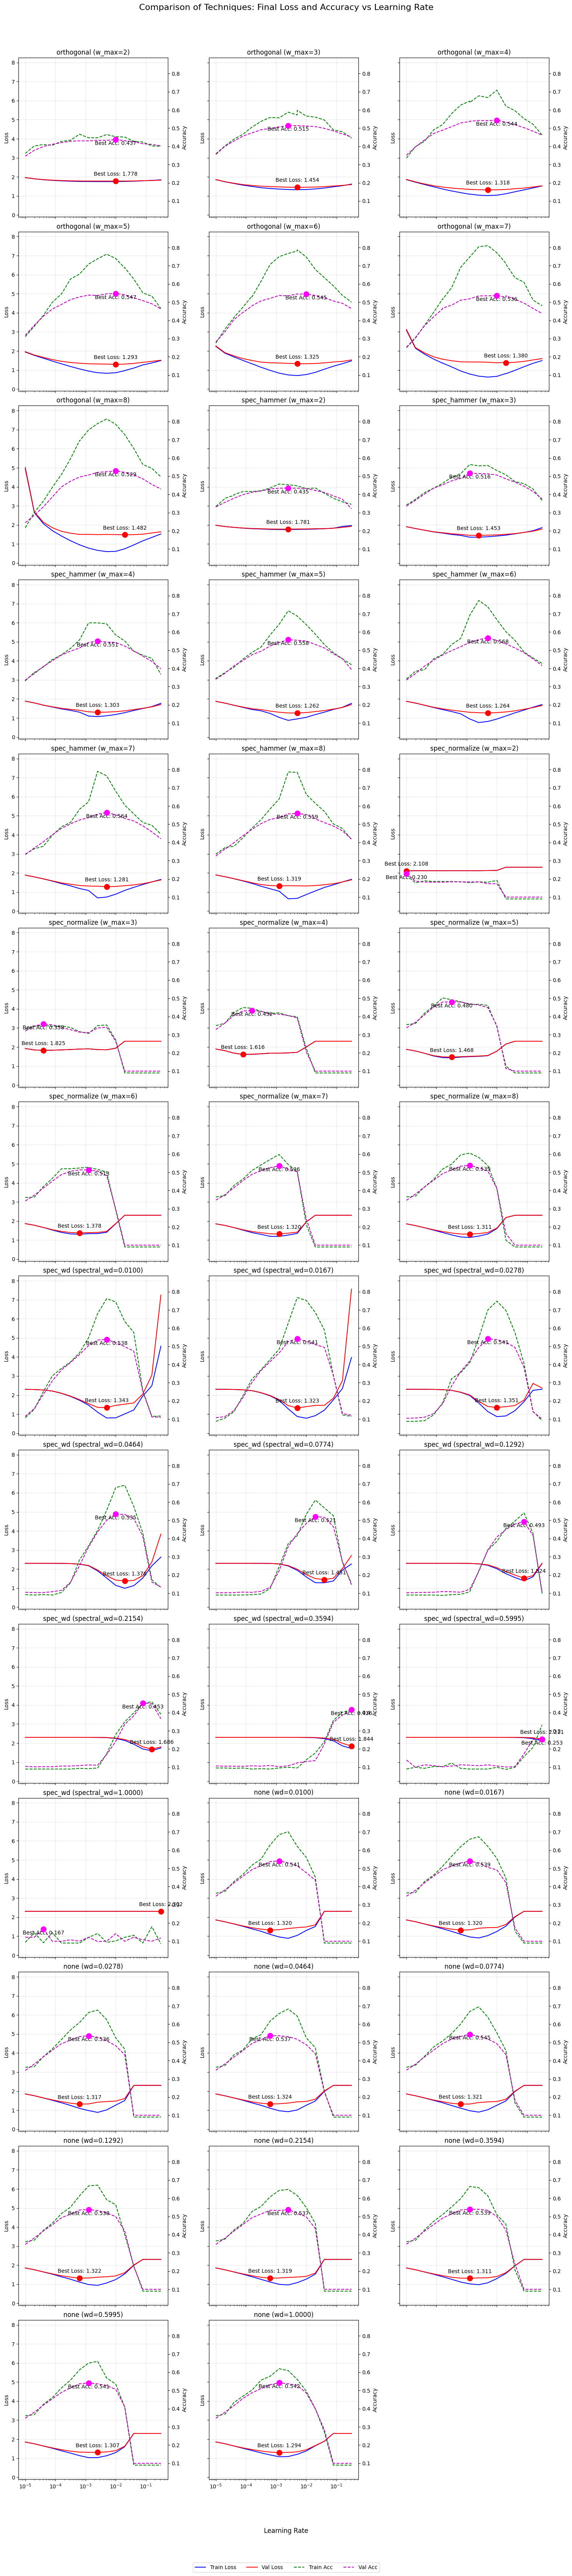

In [5]:
# Create a copy of the dataframe for plotting
plot_df = results_df.copy()

# For 'spec_wd' technique, group by 'spectral_wd' instead of 'w_max'
spec_wd_mask = plot_df['technique'] == 'spec_wd'
none_mask = plot_df['technique'] == 'none'
other_mask = ~(spec_wd_mask | none_mask)

# Group the dataframes separately
grouped_other = plot_df[other_mask].groupby(['technique', 'w_max'])
grouped_spec_wd = plot_df[spec_wd_mask].groupby(['technique', 'spectral_wd'])
grouped_none = plot_df[none_mask].groupby(['technique', 'wd'])  # Group 'none' by 'spectral_wd' which acts as 'wd'

# Get unique combinations for all groups
technique_wmax_pairs = list(grouped_other.groups.keys())
technique_spectral_wd_pairs = list(grouped_spec_wd.groups.keys())
technique_none_wd_pairs = list(grouped_none.groups.keys())

# Combine them for plotting
all_plot_pairs = technique_wmax_pairs + technique_spectral_wd_pairs + technique_none_wd_pairs

# Determine the number of plots needed and create a grid
num_plots = len(all_plot_pairs)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Ceiling division

# Create the figure with appropriate size and share both x and y axes
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharex=True, sharey=True)
axs = axs.flatten()

# Find global min and max values for losses and accuracies
min_loss = min(results_df['final_train_loss'].min(), results_df['final_val_loss'].min())
max_loss = max(results_df['final_train_loss'].max(), results_df['final_val_loss'].max())
min_acc = min(results_df['final_train_acc'].min(), results_df['final_val_acc'].min())
max_acc = max(results_df['final_train_acc'].max(), results_df['final_val_acc'].max())

# Add some padding to the ranges
loss_range = max_loss - min_loss
acc_range = max_acc - min_acc
loss_padding = loss_range * 0.1
acc_padding = acc_range * 0.1
loss_ylim = (min_loss - loss_padding, max_loss + loss_padding)
acc_ylim = (min_acc - acc_padding, max_acc + acc_padding)

# Loop through each pair
for i, pair in enumerate(all_plot_pairs):
    if i >= len(axs):  # Safety check in case there are more pairs than axes
        break
    
    technique = pair[0]
    
    # Filter the dataframe based on the technique
    if technique == 'spec_wd':
        spectral_wd = pair[1]
        subset_df = results_df[(results_df['technique'] == technique) & 
                               (results_df['spectral_wd'] == spectral_wd)]
        title = f'{technique} (spectral_wd={spectral_wd:.4f})'
    elif technique == 'none':
        wd = pair[1]
        subset_df = results_df[(results_df['technique'] == technique) & 
                              (results_df['wd'] == wd)]
        title = f'{technique} (wd={wd:.4f})'
    else:
        wmax = pair[1]
        subset_df = results_df[(results_df['technique'] == technique) & 
                               (results_df['w_max'] == wmax)]
        title = f'{technique} (w_max={wmax})'
        
    # Create a twin axis for accuracies
    ax2 = axs[i].twinx()
    
    # Sort by learning rate for better line plotting
    subset_df = subset_df.sort_values('lr')
    
    # plot the best train and val loss as a function of the learning rate on left axis
    loss_lines1, = axs[i].plot(subset_df['lr'], subset_df['final_train_loss'], 'b-', label='Train Loss')
    loss_lines2, = axs[i].plot(subset_df['lr'], subset_df['final_val_loss'], 'r-', label='Val Loss')
    
    # plot the best train and val accuracy as a function of the learning rate on right axis
    acc_lines1, = ax2.plot(subset_df['lr'], subset_df['final_train_acc'], 'g--', label='Train Acc')
    acc_lines2, = ax2.plot(subset_df['lr'], subset_df['final_val_acc'], 'm--', label='Val Acc')
    
    # Find the point with the best validation loss and mark it
    if not subset_df.empty:
        best_idx = subset_df['final_val_loss'].idxmin()
        best_lr = subset_df.loc[best_idx, 'lr']
        best_val_loss = subset_df.loc[best_idx, 'final_val_loss']
        axs[i].scatter(best_lr, best_val_loss, color='red', s=100, zorder=5)
        axs[i].annotate(f'Best Loss: {best_val_loss:.3f}', 
                       (best_lr, best_val_loss),
                       xytext=(0, 10), 
                       textcoords='offset points',
                       ha='center')
        
        # Find the point with the best validation accuracy and mark it
        best_acc_idx = subset_df['final_val_acc'].idxmax()
        best_acc_lr = subset_df.loc[best_acc_idx, 'lr']
        best_val_acc = subset_df.loc[best_acc_idx, 'final_val_acc']
        ax2.scatter(best_acc_lr, best_val_acc, color='magenta', s=100, zorder=5)
        ax2.annotate(f'Best Acc: {best_val_acc:.3f}', 
                    (best_acc_lr, best_val_acc),
                    xytext=(0, -10), 
                    textcoords='offset points',
                    ha='center')
    
    axs[i].set_title(title)
    axs[i].set_xscale('log')
    axs[i].grid(True, alpha=0.3)
    
    # Set labels for the axes
    axs[i].set_ylabel('Loss')
    ax2.set_ylabel('Accuracy')
    
    # Set the same y-limits for all plots
    axs[i].set_ylim(loss_ylim)
    ax2.set_ylim(acc_ylim)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Common x-axis label
fig.text(0.5, 0.04, 'Learning Rate', ha='center', fontsize=12)

# Title for the entire figure
fig.suptitle('Comparison of Techniques: Final Loss and Accuracy vs Learning Rate', fontsize=16, y=0.98)

# Create a unified legend
lines = [loss_lines1, loss_lines2, acc_lines1, acc_lines2]
labels = ['Train Loss', 'Val Loss', 'Train Acc', 'Val Acc']
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.03), ncol=4)

plt.tight_layout()
plt.subplots_adjust(top=0.96, bottom=0.06)  # Increase the top margin to make room for the title
plt.show()


In [6]:
#for each w_max, technique pair, print the learning rate that results in the best overall validation accuracy
# and print the learning rate that results in the best final validation accuracy
# Group by the appropriate parameters for each technique
print("Best Learning Rates for Different Techniques and Parameters:")

# For 'none' technique, group by wd
none_df = results_df[results_df['technique'] == 'none']
for wd, group in none_df.groupby('wd'):
    best_overall_idx = group['best_val_acc'].idxmax()
    best_overall_lr = group.loc[best_overall_idx, 'lr']
    best_overall_val_acc = group.loc[best_overall_idx, 'best_val_acc']
    
    best_final_idx = group['final_val_acc'].idxmax()
    best_final_lr = group.loc[best_final_idx, 'lr']
    best_final_val_acc = group.loc[best_final_idx, 'final_val_acc']
    
    print(f'Technique: none, wd: {wd:.6f}')
    print(f'  Best Overall LR: {best_overall_lr}, Best Overall Val Acc: {best_overall_val_acc:.6f}')
    print(f'  Best Final LR: {best_final_lr}, Best Final Val Acc: {best_final_val_acc:.6f}')
    print('---')

# For 'spec_wd' technique, group by spectral_wd
spec_wd_df = results_df[results_df['technique'] == 'spec_wd']
for spectral_wd, group in spec_wd_df.groupby('spectral_wd'):
    best_overall_idx = group['best_val_acc'].idxmax()
    best_overall_lr = group.loc[best_overall_idx, 'lr']
    best_overall_val_acc = group.loc[best_overall_idx, 'best_val_acc']
    
    best_final_idx = group['final_val_acc'].idxmax()
    best_final_lr = group.loc[best_final_idx, 'lr']
    best_final_val_acc = group.loc[best_final_idx, 'final_val_acc']
    
    print(f'Technique: spec_wd, spectral_wd: {spectral_wd:.6f}')
    print(f'  Best Overall LR: {best_overall_lr}, Best Overall Val Acc: {best_overall_val_acc:.6f}')
    print(f'  Best Final LR: {best_final_lr}, Best Final Val Acc: {best_final_val_acc:.6f}')
    print('---')

# For all other techniques, group by w_max
other_df = results_df[(results_df['technique'] != 'none') & (results_df['technique'] != 'spec_wd')]
for (technique, wmax), group in other_df.groupby(['technique', 'w_max']):
    best_overall_idx = group['best_val_acc'].idxmax()
    best_overall_lr = group.loc[best_overall_idx, 'lr']
    best_overall_val_acc = group.loc[best_overall_idx, 'best_val_acc']
    
    best_final_idx = group['final_val_acc'].idxmax()
    best_final_lr = group.loc[best_final_idx, 'lr']
    best_final_val_acc = group.loc[best_final_idx, 'final_val_acc']
    
    print(f'Technique: {technique}, w_max: {wmax}')
    print(f'  Best Overall LR: {best_overall_lr}, Best Overall Val Acc: {best_overall_val_acc:.6f}')
    print(f'  Best Final LR: {best_final_lr}, Best Final Val Acc: {best_final_val_acc:.6f}')
    print('---')

Best Learning Rates for Different Techniques and Parameters:
Technique: none, wd: 0.010000
  Best Overall LR: 0.0012589254117941675, Best Overall Val Acc: 0.544434
  Best Final LR: 0.0012589254117941675, Best Final Val Acc: 0.540625
---
Technique: none, wd: 0.016681
  Best Overall LR: 0.0012589254117941675, Best Overall Val Acc: 0.540723
  Best Final LR: 0.0012589254117941675, Best Final Val Acc: 0.539062
---
Technique: none, wd: 0.027826
  Best Overall LR: 0.0012589254117941675, Best Overall Val Acc: 0.537402
  Best Final LR: 0.0012589254117941675, Best Final Val Acc: 0.536328
---
Technique: none, wd: 0.046416
  Best Overall LR: 0.0012589254117941675, Best Overall Val Acc: 0.538379
  Best Final LR: 0.000630957344480193, Best Final Val Acc: 0.537012
---
Technique: none, wd: 0.077426
  Best Overall LR: 0.0012589254117941675, Best Overall Val Acc: 0.544824
  Best Final LR: 0.0012589254117941675, Best Final Val Acc: 0.544824
---
Technique: none, wd: 0.129155
  Best Overall LR: 0.001258925

In [7]:
# print unique learning rate values
unique_lrs = results_df['lr'].unique()
unique_lrs.sort()
unique_lrs

array([1.00000000e-05, 1.99526231e-05, 3.98107171e-05, 7.94328235e-05,
       1.58489319e-04, 3.16227766e-04, 6.30957344e-04, 1.25892541e-03,
       2.51188643e-03, 5.01187234e-03, 1.00000000e-02, 1.99526231e-02,
       3.98107171e-02, 7.94328235e-02, 1.58489319e-01, 3.16227766e-01])

In [8]:
(0.06309573444801933 + 0.25118864315095807) / 2

0.1571421887994887